# 3802ICT Assignment 1

<p style="text-align:right">Junghee Yang (Kat) <br>
Regnier Avice<br>
Yunpeng Huang (Steven)</p>

## Project title:

## ● A brief description of the problem/question
<p>Amsterdam is the capital city of The Netherlands, with a population of 870,000 and with 17 million tourists visiting each year. Many tourists these days are staying at Airbnbs hosted by homeowners. This dataset is from insiderairbnb.com and contains descriptions of Airbnb listings on 6th December 2018 in Amsterdam. The dataset includes the name of the listing, number of reviews, locations, etc. </p>

<p>This project consists of these problems/questions:</p>
 

<ul>
    <li><b>Classification and label prediction -</b> Can prices be predicted as expensive and non-expensive by the size of property, reviews and location?</li>
    <li><b>Association and Correlation - </b> What kind of listing attract more customers? Is it a combination or singular factor?</li>
    <li><b>Clustering </b> - Do patterns in listing attributes correspond with the geographical location of the listing?</li>
</ul>

## ● Dataset description
<p>The dataset contains Airbnb listings in Amsterdam on 6th December 2018, and it was retrieved from Kaggle with the original source being from insideairbnb.com. It includes details of Airbnb listings such as prices, reviews, size of the property etc. with 96 attributes and 20,030 data samples.</p>

## ● Algorithms/techniques for different learning tasks

### - Classification and label prediction
<b>Binary Classification using K-Nearest Neighbours</b>: 

K-nearest neighbours (KNN) algorithm is a type of supervised ML algorithm which can be used for both classifications as well as predictive regression problems. K-nearest neighbours (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. <p style="font-size:60%;">KNN Algorithm - Finding Nearest Neighbors - Tutorialspoint. https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm<p>

### - Association and Correlation
<b>FP-growth Algorithm:</b> Frequent pattern growth algorithm (FP-growth algorithm) uses Depth-first-search that follows the idea of a divide-and-conquer strategy. It first compresses the database into frequent pattern tree that still retains the itemset association information (node: item, support_count, branch: association with support_count), once the tree is constructed it will be divided into a set of conditional databases, each associated with one frequent item and then from the associated frequent item it can be feature examined.

### - Clustering
<b>K-Means (Lloyd’s Algorithm):</b> K-Means clustering is based on the idea to generate k clusters and assign each point to the cluster with the nearest mean-point. The optimal approach is NP-Hard with exponential time complexity. The Lloyd’s Algorithm is a heuristic approach to approximate the optimal result, which in practice should run in linear time complexity. <font color="red">reference</font>.

## ● Measurements to evaluate the results

### - Binary Classification
#### Mean squared error

Mean squared error is the average squared differene between the estiation and the reuslts. It is always positive value and the closer to zero, more accurate the estimation. MSE is computed as

$
{\large
\begin{align}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{align}
}%
$

, where TP = True Positive, TN = True Negatives, FP = False Positive, and FN = False Negatives. 

### - Association and Correlation
Association rule
$
{\begin{align}
(A\longrightarrow B)
\end{align}
}%
$

• Min_sup: minimum support threshold
• Min_conf: minimum confidence threshold

$
{\large
 \begin{array}{l}
supp( A\Longrightarrow B) =P( A\cup B) =\frac{( Transcation\ containing\ \boldsymbol{both} \ A,B)}{( Total\ No\ of\ transactions)}\\
confidence( A\Longrightarrow B) =P( B|A) =\frac{support\_count( A\cup B)}{support\_count( A)}\\
lift( A,B) =\frac{P( A\cup B)}{P( A) P( B)}
\end{array}
}%
$

support is a measurement of the frequency which an itemset occurs in all transactions, its value will be compared with the min_sup. Range[0,1]

confidence is a measurement of how often items in B occurs in transaction that contains X, its value will be compared with min_conf. Range[0,1]

Lift is a measurement of correlation, which state that A is independent of B if ${
\begin{align}
 P( A\cup B) =P(A)P(B)
\end{align}
}%
$ otherwise, A and B are depedent and correlated. Range[0,inf]

### Clustering

To evaluate the effectiveness of clusters the Intracluster and Intercluster distance is measured. Effective clustering minimizes the Intracluster distance while maximizing the Intercluster distance.

For this project two popular methods are used. The Dunn Index and the Silhouette analysis.

#### Dunn Index

The goal is to maximize the value of the Dunn Index. A high Dunn Index indicates large inter cluster distance and low intra cluster distance. 

$
{\large
\begin{align}
DunnIndex = \frac{min(d(InterCluster))}{max (d(IntraCluster))} 
\end{align}
}%
$


where the inter cluster distance is the maximum distance between two points of two clusters

$
{\large
\begin{align}
d(InterCluster) = max(C_{a_i}, C_{b_j})
\end{align}
}%
$


and the intra cluster distance is maximum distance between two points of the same cluster

$
{\large
\begin{align}
d(InterCluster) = max(C_{a_i}, C_{a_j})
\end{align}
}%
$

#### Silhouette analysis

For each point the silhouette value will be caluclated which can have the range of [-1,1]. The goal is to maximize the silhouette value. Many negative values are an indication for to many or to few clusters. This value will be used to determine the right size of $k$.

$
{\large
\begin{align}
\Delta s(i) = \frac{b(i)-a(i)}{max (a(i),b(i)}
\end{align}
}%
$

where $a(i)$ is the mean distance of the point $i$ to other points of the same cluster

$
{\large
\begin{align}
\Delta a(i) = \frac{\Sigma  d(i,j)}{|C_i| -1}
\end{align}
}%
$

and $b(i)$ is the minimum (In case of more than two clusters the smallest mean is taken) mean distance of the point $i$ to other points of the other cluster. 
$
{\large
\begin{align}
\Delta b(i) = min(\frac{\Sigma  d(i,j)}{|C_k|}) \hspace{1cm}for \hspace{0.5cm} k \neq i
\end{align}
}%
$

## Libaries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
import math
from scipy import stats
from scipy.stats import norm

#interactive map
import folium
from folium.plugins import HeatMap

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

## Data exploration

### - Dataset

In [53]:
# Read dataset
git_url = "https://raw.githubusercontent.com/jungheeyang/3802ICT-Assignment-1/master/listings_details.csv"
df = pd.read_csv(git_url, sep=',', low_memory=False)

In [3]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"It contains {df.duplicated().sum()} duplicates.")

The dataset has 20030 rows and 96 columns.
It contains 0 duplicates.


#### 1) Original dataframe

<ul>
    <li style="font-size:16px">Number of the data samples</li>
    <ul>
        <li style="list-style-type: square">Total number of samples: 20,030</li>
        <li style="list-style-type: square">Total number of columns: 96</li>
    </ul>
</ul>


In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

<br>
<br>
<ul>
    <ul>
        <li style="list-style-type: square">Total number of NULL</li>
    </ul>
</ul>


In [6]:
df.isnull().sum(axis = 0)

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                  38
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   2406
Length: 96, dtype: int64

<br>
<br>
<ul>
    <li style="font-size:16px">Types of attributes</li>
    <ul><li>Mostly in object typles</li>
    </ul>
</ul>

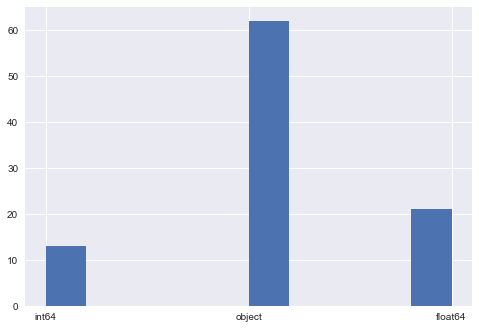

In [7]:
plt.hist(df.dtypes.astype(str))
plt.show()

<br>
<br>
<ul>
    <li style="font-size:16px">Select useful columns for analyisis</li>
</ul>

In [56]:
columns_to_keep = ['id', 'host_is_superhost', 'description', 'latitude', 'longitude', 'host_identity_verified',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'price', 'amenities', 'square_feet', 'security_deposit', 'host_response_rate',
                   'minimum_nights', 'instant_bookable', 'availability_365', 'weekly_price', 
                   'monthly_price', 'zipcode','number_of_reviews', 'review_scores_rating']

df_mod = df[columns_to_keep].set_index('id')
print("The dataset has {} rows and {} columns - after dropping irrelevant columns.".format(*df_mod.shape))

The dataset has 20030 rows and 24 columns - after dropping irrelevant columns.


#### 2) Selected dataframe

<ul>
    <li style="font-size:16px">statistical information of each attribute - Five number summery</li>
</ul>

In [9]:
df_mod.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,minimum_nights,availability_365,number_of_reviews,review_scores_rating
count,20030.000000,20030.000000,20030.000000,20020.000000,20022.00000,20023.000000,406.000000,20030.000000,20030.000000,20030.000000,17391.000000
mean,52.365212,4.888977,2.891912,1.137662,1.44506,1.849223,520.485222,3.328707,59.913679,21.560459,94.849520
std,0.015996,0.035573,1.318760,0.793903,0.88568,1.389664,544.557660,12.537419,104.027710,43.240292,6.648685
min,52.288378,4.753247,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000
25%,52.355126,4.863595,2.000000,1.000000,1.00000,1.000000,0.000000,2.000000,0.000000,3.000000,93.000000
50%,52.364590,4.886387,2.000000,1.000000,1.00000,1.000000,484.000000,2.000000,3.000000,8.000000,97.000000
75%,52.375074,4.908288,4.000000,1.000000,2.00000,2.000000,807.000000,3.000000,67.000000,22.000000,100.000000
max,52.424713,5.027689,17.000000,100.500000,12.00000,32.000000,4306.000000,1001.000000,365.000000,695.000000,100.000000


## ● Data pre-processing

### - Data type modification

In [10]:
df_mod[['price', 'weekly_price', 'monthly_price', 'security_deposit']].head(3)

,price,weekly_price,monthly_price,security_deposit
id,,,,
2818,$59.00,NaN,"$1,500.00",$100.00
3209,$160.00,$543.00,"$2,000.00",$300.00
20168,$80.00,NaN,NaN,NaN


In [11]:
#can be left as null: description, square_feet, drop no zip_code
df_mod.isna().sum()

host_is_superhost             4
description                 124
latitude                      0
longitude                     0
host_identity_verified        4
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    10
bedrooms                      8
beds                          7
price                         0
amenities                     0
square_feet               19624
security_deposit           6166
host_response_rate         9483
minimum_nights                0
instant_bookable              0
availability_365              0
weekly_price              17187
monthly_price             18469
zipcode                     866
number_of_reviews             0
review_scores_rating       2639
dtype: int64

In [12]:
def dollar_to_float(df):
    df = df.replace('[\$,]', '', regex=True).astype(float)
    return df


def obj_to_bool(df):
    df = df.replace('f', 'FALSE', regex=True).astype(bool)
    df = df.replace('t', 'TRUE', regex=True).astype(bool)
    return df


def percent_to_float(df):
    df = df.replace('%', '', regex=True).astype(float)
    return df


df_mod.price = dollar_to_float(df_mod.price)
df_mod.security_deposit = dollar_to_float(df_mod.security_deposit)
df_mod.weekly_price = dollar_to_float(df_mod.weekly_price)
df_mod.monthly_price = dollar_to_float(df_mod.monthly_price)
df_mod.security_deposit = dollar_to_float(df_mod.security_deposit)

df_mod.host_is_superhost = obj_to_bool(df_mod.host_is_superhost)
df_mod.host_identity_verified = obj_to_bool(df_mod.host_identity_verified)

# Save noisy data for demonstration
df_snapshot = df_mod

df_mod.head()

,host_is_superhost,description,latitude,longitude,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,...,security_deposit,host_response_rate,minimum_nights,instant_bookable,availability_365,weekly_price,monthly_price,zipcode,number_of_reviews,review_scores_rating
id,,,,,,,,,,,,,,,,,,,,,
2818,True,Quiet Garden View Room & Super Fast WiFi I'm r...,52.365755,4.941419,True,Apartment,Private room,2,1.5,1.0,...,100.0,100%,3,t,44,NaN,1500.0,NaN,248,97.0
3209,True,You will love our spacious (90 m2) bright apar...,52.390225,4.873924,True,Apartment,Entire home/apt,5,1.0,2.0,...,300.0,100%,4,f,47,543.0,2000.0,1013 XE,42,96.0
20168,True,"Cozy studio on your own private floor, 100% in...",52.365087,4.893541,True,Townhouse,Entire home/apt,2,1.0,1.0,...,NaN,100%,1,f,198,NaN,NaN,1017,233,87.0
25428,True,"This nicely furnished, newly renovated apt is...",52.373114,4.883668,True,Apartment,Entire home/apt,3,1.0,1.0,...,300.0,100%,14,f,141,650.0,2000.0,1016,1,100.0
27886,True,Stylish and romantic houseboat on fantastic hi...,52.386727,4.892078,True,Houseboat,Private room,2,1.0,1.0,...,0.0,100%,2,t,199,810.0,2500.0,1013,171,99.0


### - Handle Missing Data

* Remove unuseful records

In [13]:
df_mod['security_deposit'].fillna(0, inplace=True)

* Calculate missing weekly and monthly prices

In [14]:
#Standard weekly price is 7*price
df_mod['weekly_price'].fillna(df_mod['price']*7, inplace=True)

#Standard monthly price is 30*price
df_mod['monthly_price'].fillna(df_mod['price']*30, inplace=True)

* Exclude property with listed price of 0

In [15]:
df_mod = df_mod.loc[df_mod['price'] > 0]

* Remove outliers in price

In [16]:
df_mod['z_score'] = np.abs(stats.zscore(df_mod['price']))
df_mod = df_mod[df_mod.z_score < 3]

/Users/katyang/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### - Dataset after pre-processing

In [17]:
df_mod.head(3)

,host_is_superhost,description,latitude,longitude,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,...,host_response_rate,minimum_nights,instant_bookable,availability_365,weekly_price,monthly_price,zipcode,number_of_reviews,review_scores_rating,z_score
id,,,,,,,,,,,,,,,,,,,,,
2818,True,Quiet Garden View Room & Super Fast WiFi I'm r...,52.365755,4.941419,True,Apartment,Private room,2,1.5,1.0,...,100%,3,t,44,413.0,1500.0,NaN,248,97.0,0.639099
3209,True,You will love our spacious (90 m2) bright apar...,52.390225,4.873924,True,Apartment,Entire home/apt,5,1.0,2.0,...,100%,4,f,47,543.0,2000.0,1013 XE,42,96.0,0.053514
20168,True,"Cozy studio on your own private floor, 100% in...",52.365087,4.893541,True,Townhouse,Entire home/apt,2,1.0,1.0,...,100%,1,f,198,560.0,2400.0,1017,233,87.0,0.495090


In [18]:
# No NULL values 
df_mod.isnull().sum(axis = 0)

host_is_superhost             0
description                 122
latitude                      0
longitude                     0
host_identity_verified        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     8
bedrooms                      8
beds                          7
price                         0
amenities                     0
square_feet               19472
security_deposit              0
host_response_rate         9431
minimum_nights                0
instant_bookable              0
availability_365              0
weekly_price                  0
monthly_price                 0
zipcode                     861
number_of_reviews             0
review_scores_rating       2588
z_score                       0
dtype: int64

## ● Data exploration

<ul>
    <li style="font-size:16px">Number of the data samples</li>
    <ul>
        <li style="list-style-type: square">Total number of samples: 20,030</li>
    </ul>
</ul>


In [54]:
df.count()

id                                  20030
listing_url                         20030
scrape_id                           20030
last_scraped                        20030
name                                19992
                                    ...  
cancellation_policy                 20030
require_guest_profile_picture       20030
require_guest_phone_verification    20030
calculated_host_listings_count      20030
reviews_per_month                   17624
Length: 96, dtype: int64

<br>
<br>
<ul>
    <ul>
        <li style="list-style-type: square">Total number of NULL</li>
    </ul>
</ul>


In [20]:
df.isnull().sum(axis = 0)

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                  38
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   2406
Length: 96, dtype: int64

<br>
<br>
<ul>
    <li style="font-size:16px">Types of attributes</li>
</ul>

In [21]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 96, dtype: object

<br>
<br>
<ul>
    <li style="font-size:16px">statistical information of each attribute - Five number summery</li>
</ul>

In [22]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.003000e+04,2.003000e+04,0.0,0.0,0.0,2.003000e+04,0.0,20026.000000,20026.000000,0.0,...,20030.000000,17391.000000,17381.000000,17383.000000,17369.000000,17378.000000,17370.000000,17371.000000,20030.000000,17624.00000
mean,1.541725e+07,2.018121e+13,NaN,NaN,NaN,4.868570e+07,NaN,6.105812,6.105812,NaN,...,21.560459,94.849520,9.679765,9.465627,9.735563,9.785361,9.421531,9.175004,4.734698,1.06208
std,8.569404e+06,0.000000e+00,NaN,NaN,NaN,5.649635e+07,NaN,30.388516,30.388516,NaN,...,43.240292,6.648685,0.685271,0.867973,0.646557,0.599409,0.727931,0.805422,22.921886,1.33332
min,2.818000e+03,2.018121e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.01000
25%,8.188423e+06,2.018121e+13,NaN,NaN,NaN,8.093516e+06,NaN,1.000000,1.000000,NaN,...,3.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.27000
50%,1.563049e+07,2.018121e+13,NaN,NaN,NaN,2.369450e+07,NaN,1.000000,1.000000,NaN,...,8.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.62000
75%,2.202577e+07,2.018121e+13,NaN,NaN,NaN,6.827535e+07,NaN,1.000000,1.000000,NaN,...,22.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.23000
max,3.058041e+07,2.018121e+13,NaN,NaN,NaN,2.293612e+08,NaN,698.000000,698.000000,NaN,...,695.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,208.000000,11.85000


## ● Visualization

### - Visualisation distribution plot

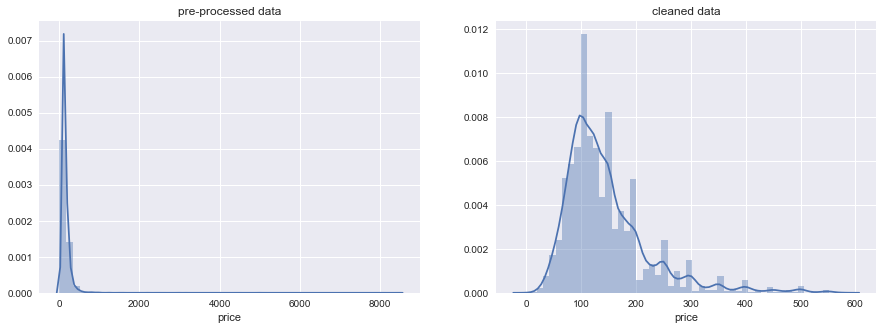

In [23]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['price'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['price'], ax=ax2)

plt.show()

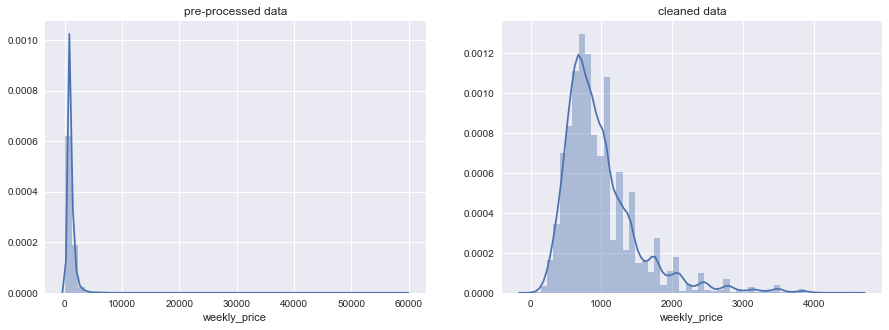

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['weekly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['weekly_price'], ax=ax2)

plt.show()

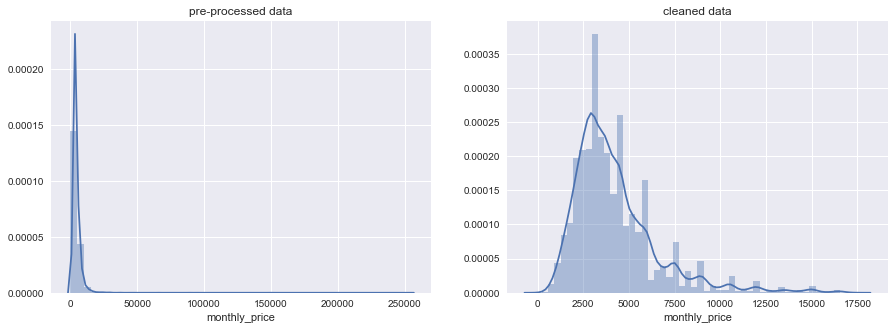

In [25]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.distplot(df_snapshot['monthly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.distplot(df_mod['monthly_price'], ax=ax2)

plt.show()

### - Boxplot

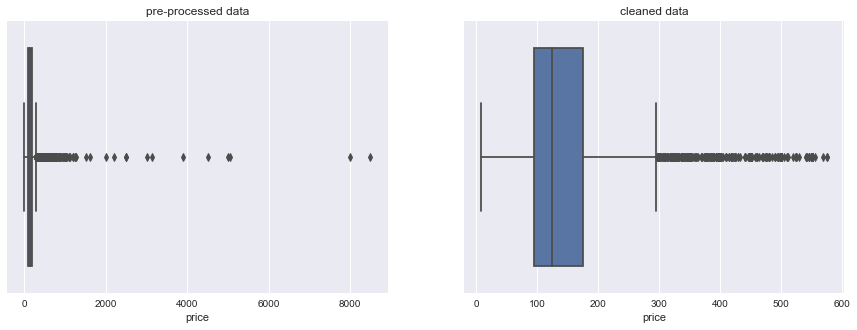

In [26]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['price'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['price'], ax=ax2)

plt.show()

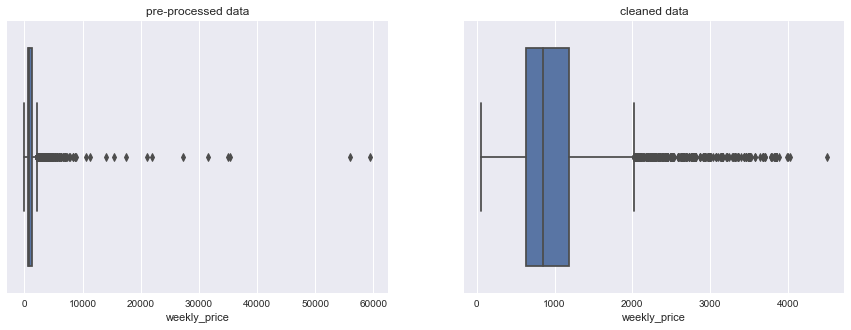

In [27]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['weekly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['weekly_price'], ax=ax2)

plt.show()

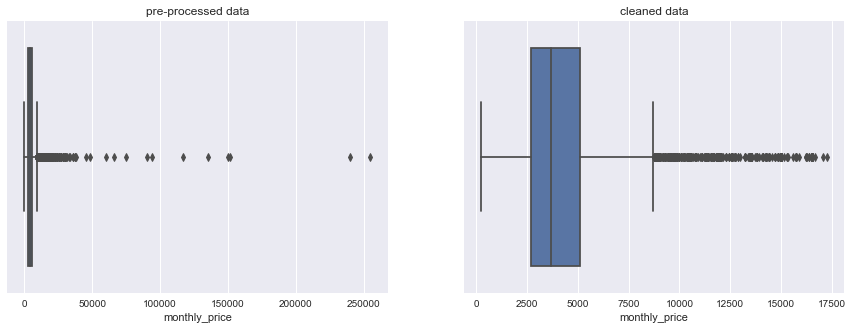

In [28]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('pre-processed data')
sns.boxplot(df_snapshot['monthly_price'], ax=ax1)

ax2.set_title('cleaned data')
sns.boxplot(df_mod['monthly_price'], ax=ax2)

plt.show()

### - Room and property type frequency (min-max normalisation)

In [29]:
df_mod.room_type.value_counts(normalize=True)

Entire home/apt    0.792180
Private room       0.204549
Shared room        0.003271
Name: room_type, dtype: float64

In [30]:
df_mod.property_type.value_counts(normalize=True)

Apartment                 0.779751
House                     0.075530
Townhouse                 0.031953
Bed and breakfast         0.022795
Loft                      0.018769
Boat                      0.018417
Condominium               0.016253
Houseboat                 0.011171
Guest suite               0.007649
Aparthotel                0.003673
Serviced apartment        0.002717
Other                     0.002516
Guesthouse                0.002164
Villa                     0.001610
Boutique hotel            0.001359
Cabin                     0.000704
Bungalow                  0.000604
Cottage                   0.000604
Hotel                     0.000302
Casa particular (Cuba)    0.000252
Tiny house                0.000252
Hostel                    0.000201
Barn                      0.000201
Chalet                    0.000151
Camper/RV                 0.000101
Campsite                  0.000101
Tent                      0.000050
Castle                    0.000050
Nature lodge        

### - Correlation matrix

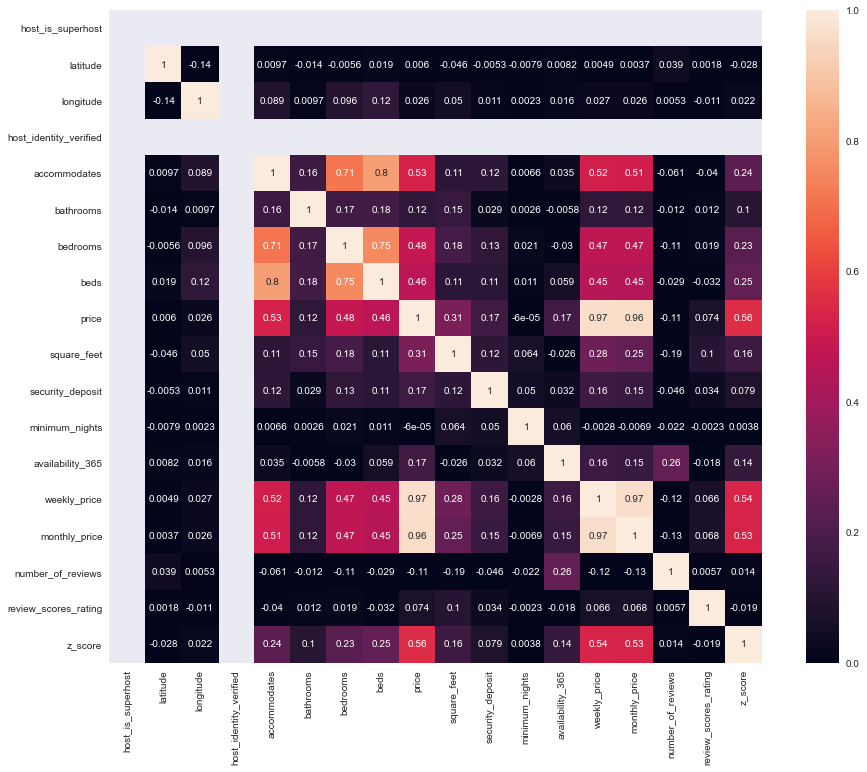

In [31]:
#correlation matrix
corrmat = df_mod.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, square=True, vmin=0, vmax=1, annot=True)

### - Scatter plot and histogram
(plotted variables against each other)

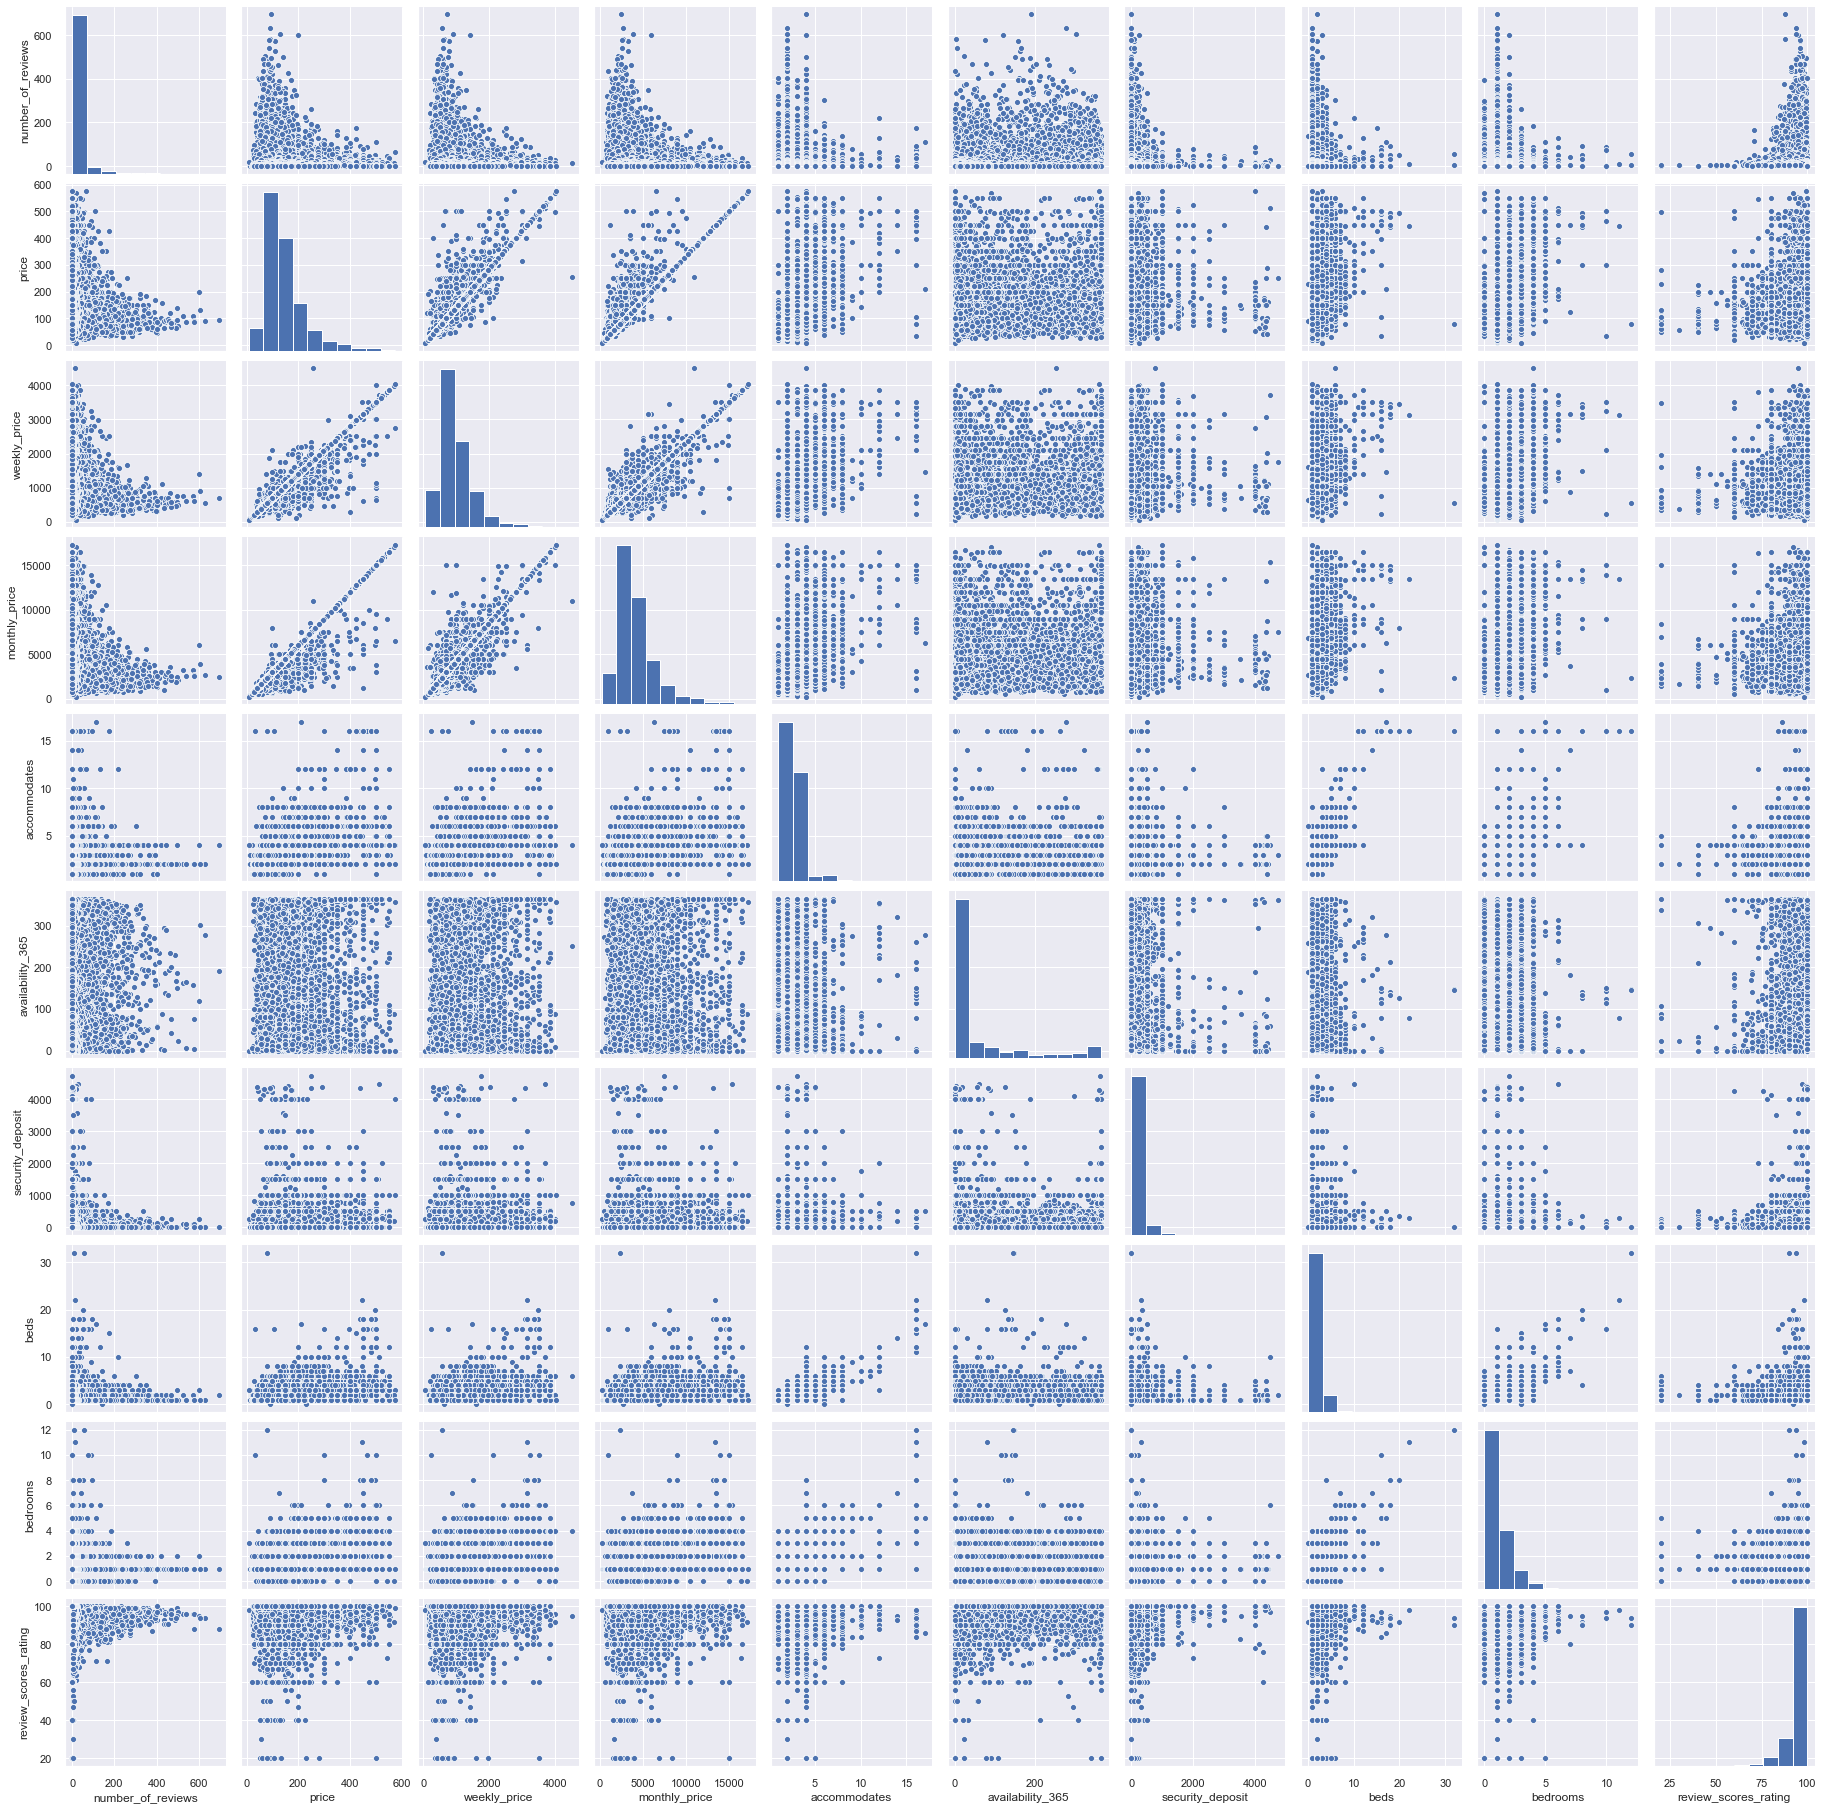

In [32]:
sns.set()
cols=['number_of_reviews', 'price', 'weekly_price', 'monthly_price', 
     'accommodates','room_type','availability_365','security_deposit', 
      'beds', 'bedrooms', 'review_scores_rating']
sns.pairplot(df_mod[cols])
plt.show()

### - Another dataframe for spatial visualisation

In [33]:
columns_to_keep_map = ['id', 'host_is_superhost', 'description', 'latitude', 'longitude', 'host_identity_verified',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'price', 'amenities', 'square_feet', 'security_deposit', 
                   'minimum_nights', 'instant_bookable', 'availability_365', 'weekly_price', 
                   'monthly_price', 'zipcode','number_of_reviews', 'review_scores_rating', 
                    'neighbourhood_cleansed']
df_c = df[columns_to_keep_map].set_index('id')

In [34]:
df_c.columns

Index(['host_is_superhost', 'description', 'latitude', 'longitude',
       'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'amenities', 'square_feet',
       'security_deposit', 'minimum_nights', 'instant_bookable',
       'availability_365', 'weekly_price', 'monthly_price', 'zipcode',
       'number_of_reviews', 'review_scores_rating', 'neighbourhood_cleansed'],
      dtype='object')

In [35]:
# Modify datatype
df_c.price = dollar_to_float(df_c.price)
df_c.security_deposit = dollar_to_float(df_c.security_deposit)
df_c.weekly_price = dollar_to_float(df_c.weekly_price)
df_c.monthly_price = dollar_to_float(df_c.monthly_price)
df_c.security_deposit = dollar_to_float(df_c.security_deposit)
df_c.host_is_superhost = obj_to_bool(df_c.host_is_superhost)
df_c.host_identity_verified = obj_to_bool(df_c.host_identity_verified)


# Fill NA in security_deposit
df_c['security_deposit'].fillna(0, inplace=True)

# Fill NA in weekly_price: Standard weekly price is 7*price
df_c['weekly_price'].fillna(df_c['price']*7, inplace=True)

# Fill NA in monthly_price: Standard monthly price is 30*price
df_c['monthly_price'].fillna(df_c['price']*30, inplace=True)

# Remove outliers in price column
df_c = df_c.loc[df_c['price'] > 0]
df_c.dropna(subset=['beds', 'bedrooms', 'bathrooms', 'zipcode', 'review_scores_rating'], inplace=True)

In [36]:
df_c.isna().sum()

host_is_superhost             0
description                  69
latitude                      0
longitude                     0
host_identity_verified        0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     0
bedrooms                      0
beds                          0
price                         0
amenities                     0
square_feet               16317
security_deposit              0
minimum_nights                0
instant_bookable              0
availability_365              0
weekly_price                  0
monthly_price                 0
zipcode                       0
number_of_reviews             0
review_scores_rating          0
neighbourhood_cleansed        0
dtype: int64

In [37]:
df_c.to_csv('listings_details_updated_association(neighbourhood).csv')

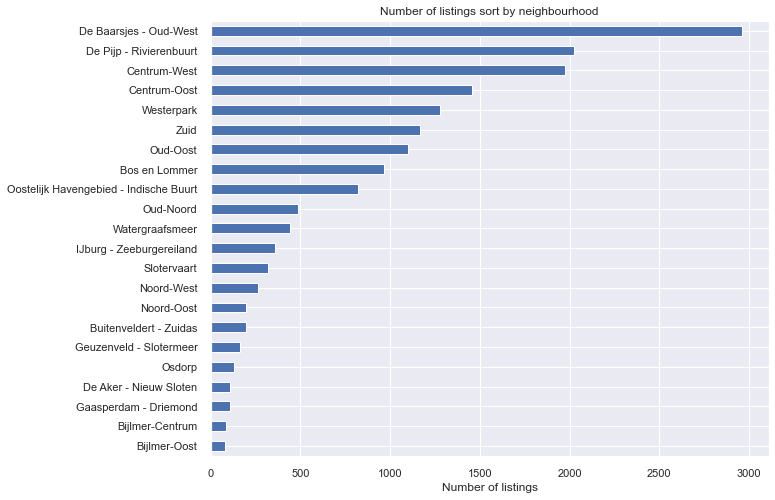

Bijlmer-Oost               79
Bijlmer-Centrum            88
Gaasperdam - Driemond     106
De Aker - Nieuw Sloten    107
Osdorp                    132
Name: neighbourhood_cleansed, dtype: int64

In [38]:
freq_n = df_c['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
freq_n.plot.barh(figsize=(10, 8), color='b')
plt.title("Number of listings sort by neighbourhood")
plt.xlabel('Number of listings', fontsize=12)
plt.show()
freq_n.head()

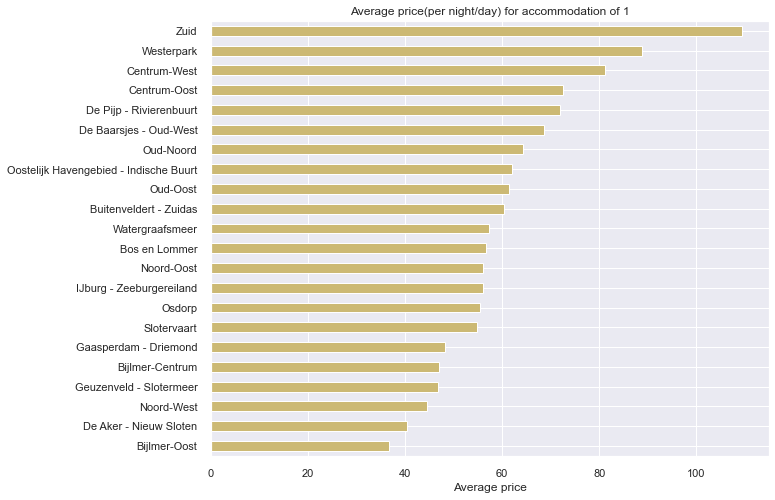

In [39]:
freq_p = df_c[df_c['accommodates']==1]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='y')
plt.title("Average price(per night/day) for accommodation of 1")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

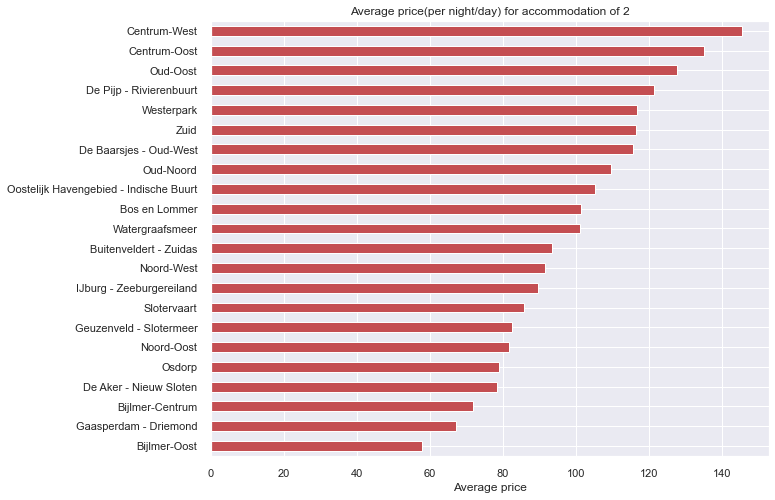

In [40]:
freq_p = df_c[df_c['accommodates']==2]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='r')
plt.title("Average price(per night/day) for accommodation of 2")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

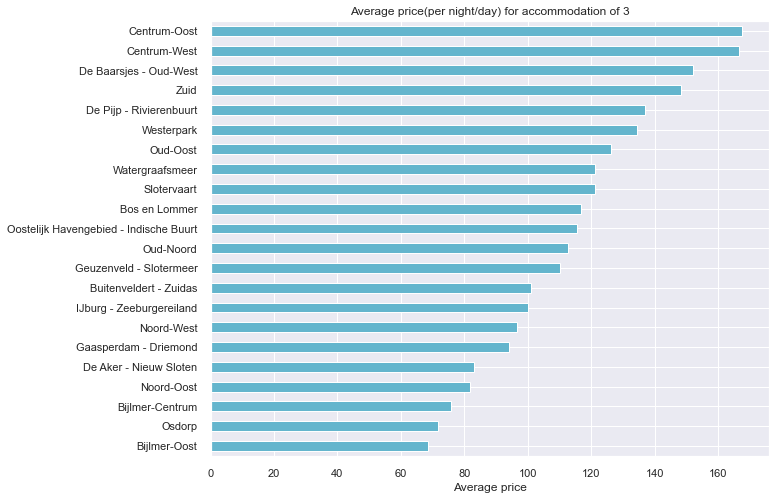

In [41]:
freq_p = df_c[df_c['accommodates']==3]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='c')
plt.title("Average price(per night/day) for accommodation of 3")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

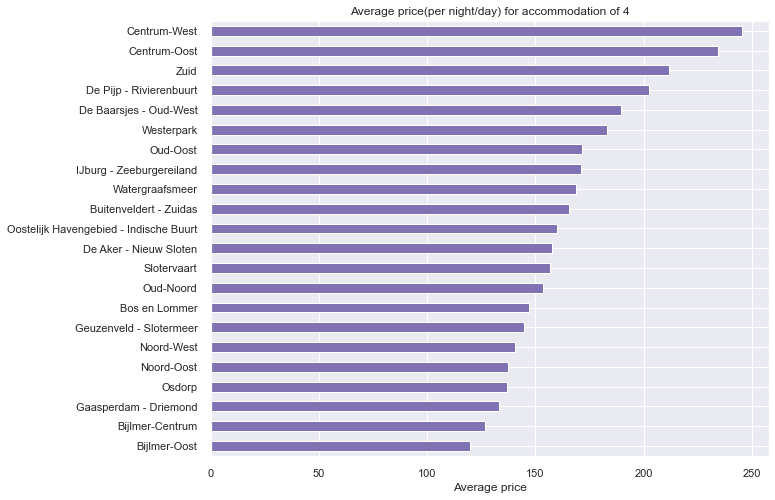

In [42]:
freq_p = df_c[df_c['accommodates']==4]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='m')
plt.title("Average price(per night/day) for accommodation of 4")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

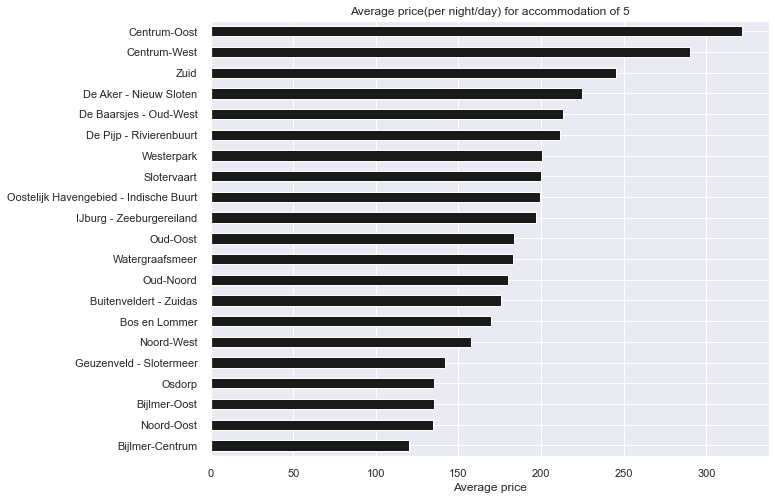

In [43]:
freq_p = df_c[df_c['accommodates']==5]
freq_p = freq_p.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
freq_p.plot.barh(figsize=(10, 8), color='k')
plt.title("Average price(per night/day) for accommodation of 5")
plt.xlabel('Average price', fontsize=12)
plt.ylabel("")
plt.show()

### - Heatmap of airbnb listings

In [44]:
#heatmap of airbnb listings
map = folium.Map(location=[52.3680, 4.9036], zoom_start = 11.7)

HeatMap(df_c[['latitude','longitude']].dropna(),
              radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)

map

<Figure size 720x576 with 0 Axes>

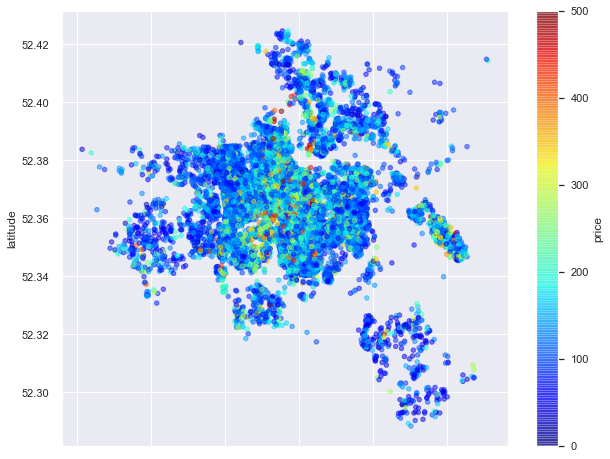

In [45]:
plt.figure(figsize=(10,8))
map_price=df_mod[df_mod.price<500]
im = map_price.plot(kind='scatter', x='longitude',y='latitude',c='price',
                 cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5,figsize=(10,8), vmin=0, vmax=500);
plt.ioff()

In [46]:
import nltk
nltk.download('stopwords')

df_mod['description'].fillna("n/a", inplace=True)

#remove numbers
df_mod['description']= df_mod['description'].str.replace('\d+', '')

#to lowercase
df_mod['description']= df_mod['description'].str.lower()

#remove window new line
df_mod['description']= df_mod['description'].str.replace('\r\n', "")

#remove stopwords
stop_english = stopwords.words("english")
df_mod['description'] = df_mod['description'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
df_mod['description'] = df_mod['description'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
df_mod['description'] = df_mod['description'].str.replace('\s+', ' ')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
texts = df_mod['description'].tolist()
vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(word_freq, columns=['words', 'counts']).sort_values(
    by="counts", ascending=False)
cvec_df.head(15)

,words,counts
10,apartment,34608
11,amsterdam,28110
3,room,18642
184,kitchen,16952
14,city,14995
134,house,14641
245,living,12790
8,bedroom,12305
173,bathroom,12190
12,located,11620


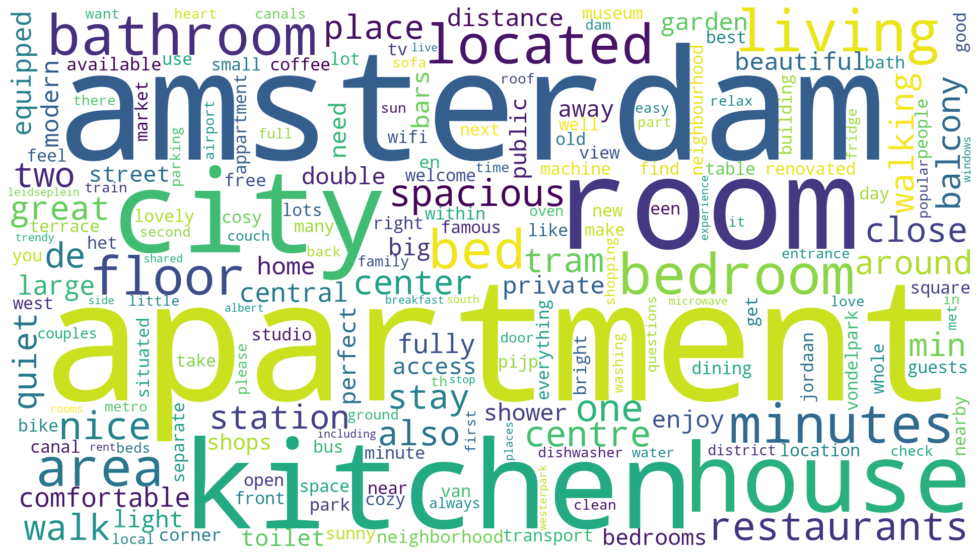

In [68]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(background_color='white', width=1920,height=1080)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('neighbourhood.png')
plt.show()

In [49]:
cvec_df.to_csv('keywords.csv', index=False)

In [50]:
df_mod.to_csv('listings_details_cleaned.csv',index=False)